# Analyse des données de systèmes éducatifs

Etude data - Projet 2 Nalron (Septembre 2020) OpenClassrooms / CentraleSupélec

Traitement des données sur Jupyter Notebook (Distribution Anaconda)

Etude réalisée en langage Python

Data source : [Données de la Banque mondiale](https://datacatalog.worldbank.org/dataset/education-statistics)

---

## Rappel du contexte :
Data Scientist dans une **start-up de la EdTech**, nommée **academy**, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

**Mark**, votre manager, vous a convié à une réunion pour vous présenter le projet d’**expansion à l’international** de l’entreprise. Il vous confie une **première mission d’analyse exploratoire**, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

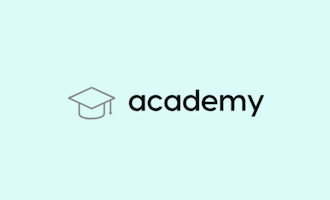

## Mission :
`Mission communiquée par email from Mark…`


Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

Ou en téléchargement direct dans le dossier dataset.

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

---

## Chargement et nettoyage des données 

In [1]:
import pandas as pd
import seaborn as sns
import folium
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_rows', 4000)
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

**`EdStatsCountry.csv`**\
Informations très larges sur le contexte économique de chaque pays du Monde.

In [3]:
#Loading 'EdStatsCountry.csv'
country = pd.read_csv('p2_data/EdStatsCountry.csv')
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
country.shape

(241, 32)

In [5]:
#Missing values
display(country.isna().sum().sum()) #cumulative sum 
display(country.isna().sum().sort_values(ascending=True))

2354

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
WB-2 code                                              1
2-alpha code                                           3
System of National Accounts                           26
Currency Unit                                         26
Region                                                27
Income Group                                          27
Latest population census                              28
National accounts base year                           36
System of trade                                       41
SNA price valuation                                   44
Latest trade data                                     56
IMF data dissemination standard                       60
Balance of Payments Manual in use                     60
Latest water withdrawal data   

In [6]:
def missing_value_clean(data):
    '''Percentage of available (non-missing) values in the sample.'''
    sample_data_part = (data.count()/data.shape[0]*100).round(0)
    sample_data_part.sort_values(ascending=False, inplace=True)
    return sample_data_part

print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(country)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


Country Code                                         100.0
WB-2 code                                            100.0
Short Name                                           100.0
Table Name                                           100.0
Long Name                                            100.0
2-alpha code                                          99.0
Currency Unit                                         89.0
Region                                                89.0
Income Group                                          89.0
System of National Accounts                           89.0
Latest population census                              88.0
National accounts base year                           85.0
System of trade                                       83.0
SNA price valuation                                   82.0
Latest trade data                                     77.0
Balance of Payments Manual in use                     75.0
IMF data dissemination standard                       75

La plupart des variables ne sont pas exploitables, mais ne semblent pas importantes dans le contexte de l'analyse.

In [7]:
country.duplicated('Country Code', keep='first').sum()

0

In [8]:
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [9]:
display(country['Country Code'].nunique())
display(country['Country Code'].unique())

241

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI',
       'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY',
       'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA',
       'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC',
       'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC',
       'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE',
       'LKA', 'LMC',

L'ensemble des pays du Monde sont traités dans l'échantillon.

In [10]:
display(country['Short Name'].unique())

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


In [11]:
display(country['Region'].nunique())
display(country['Region'].unique())

7

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

Il peut-être pertinent, suivant les questions posées, de procéder non pas par pays, mais par continent ou groupement de pays.

In [12]:
#Counting countries / World Region
country.groupby('Region')['Country Code'].count().sort_values(ascending=False)

Region
Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Country Code, dtype: int64

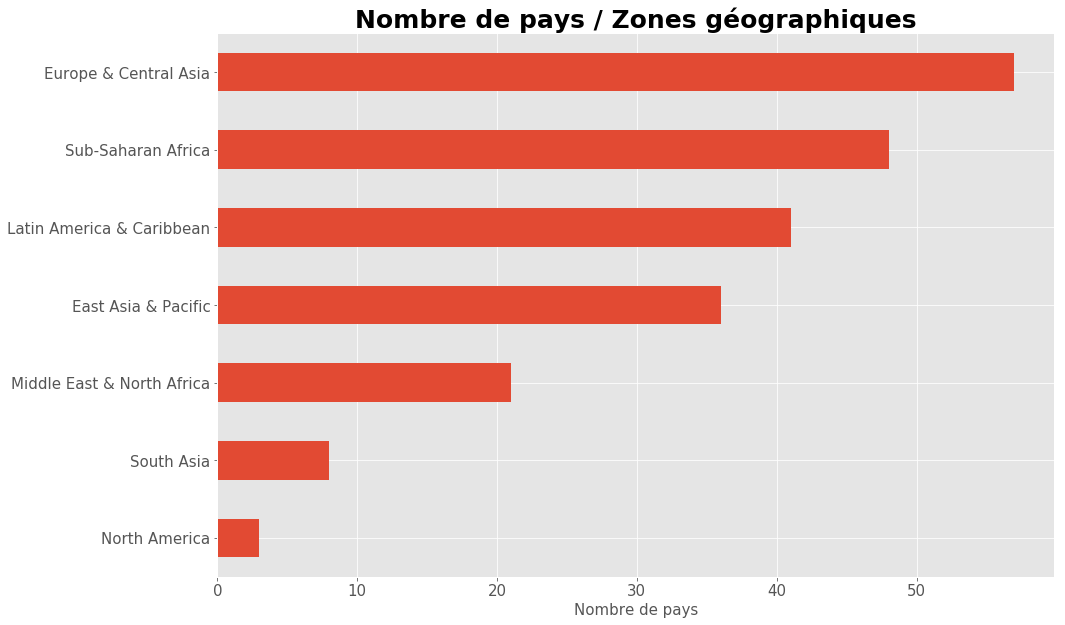

In [13]:
country.groupby('Region')['Country Code'].count().sort_values(ascending=True).plot(kind='barh')
plt.title('Nombre de pays / Zones géographiques')
plt.xlabel('Nombre de pays')
plt.ylabel('')

plt.savefig('p2_00_graphic/pays_zones_geographiques.png')
plt.show()

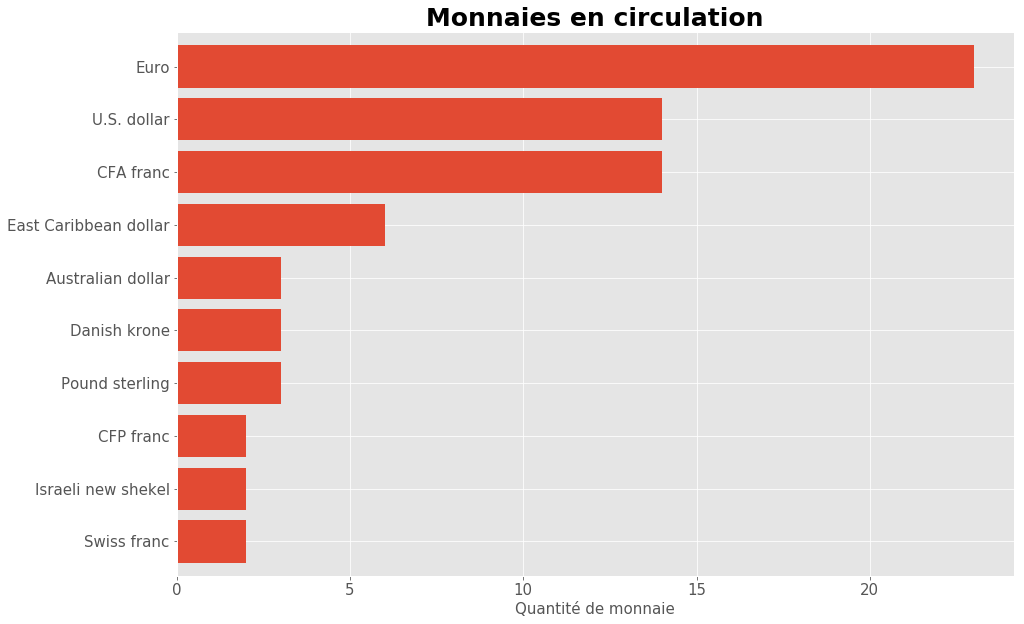

In [14]:
country['Currency Unit'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', width=.8)
plt.title('Monnaies en circulation')
plt.xlabel('Quantité de monnaie')

plt.savefig('p2_00_graphic/monnaies.png')
plt.show()

In [15]:
country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [16]:
#Classification of high income countries
country[country['Income Group']
        .isin(['High income: nonOECD', 'High income: OECD'])][['Country Code', 'Short Name']]

,Country Code,Short Name
0,ABW,Aruba
4,AND,Andorra
6,ARE,United Arab Emirates
10,ATG,Antigua and Barbuda
11,AUS,Australia
12,AUT,Austria
15,BEL,Belgium
20,BHR,Bahrain
21,BHS,The Bahamas
25,BMU,Bermuda


Notons que l'échantillon peut-être utilisé indirectement dans la résolution de notre problématique. En effet, les données pourront être exploitées, si nécessaire, pour obtenir une vision géoéconomique des pays, sans pour autant exprimer le contexte métier de l'éducation online.

**`EdStatsCountry-Series.csv`**\
Informations descriptives sur les sources des données du dataframe 'country'.

In [17]:
#Loading 'EdStatsCountry-Series.csv'
countrySeries = pd.read_csv('p2_data/EdStatsCountry-Series.csv')
countrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [18]:
display(countrySeries.shape)
display(countrySeries.isna().sum())

(613, 4)

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [19]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(countrySeries)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


DESCRIPTION    100.0
SeriesCode     100.0
CountryCode    100.0
Unnamed: 3       0.0
dtype: float64

In [20]:
countrySeries.duplicated(subset=['CountryCode', 'SeriesCode']).sum()

0

In [21]:
display(countrySeries['CountryCode'].nunique())
display(countrySeries['CountryCode'].unique())

211

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN',
       'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN',
       'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA',
       'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD',
       'MLI', 'MLT',

Notons 211 pays VS 241 pays dans le dataframe 'country'. Peu d'importance dans le contexte de l'analyse…

In [22]:
#Check missing countries in relation to the 'country' dataframe
country[~country['Country Code'].isin(countrySeries['CountryCode'].unique())][['Short Name']]

,Short Name
5,Arab World
47,Curaçao
57,East Asia & Pacific (developing only)
58,East Asia & Pacific (all income levels)
59,Europe & Central Asia (developing only)
60,Europe & Central Asia (all income levels)
63,Euro area
68,European Union
89,High income
92,Heavily indebted poor countries (HIPC)


In [23]:
display(countrySeries['SeriesCode'].nunique())
display(countrySeries['SeriesCode'].unique())

21

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

In [24]:
countrySeries['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

`countrySeries` renvoit 211 codes Pays, notons que l'ONU dénombre 197 Etats dans le Monde. Le découpage peut-être différent, à ce stade de l'analyse il n'y a aucune importance à adopter une granularité plus fine des territoires. L'échantillon semble traiter des thématiques liées aux populations des pays, dans l'immédiat il ne ressort aucun lien d'importance avec nos objectifs.

**`EdStatsData.csv`**\
Informations sur l'évolution de nombreux indicateurs pour chaque pays du Monde, avec des spécificités par zone géographique.

In [25]:
#Loading 'EdStatsData.csv'
data = pd.read_csv('p2_data/EdStatsData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
display(data.shape)
display(data.isna().sum().sort_values(ascending=False))

(886930, 70)

Unnamed: 69       886930
2017              886787
2016              870470
1971              851393
1973              851385
1972              851311
1974              851200
1979              850121
1976              849447
1982              849419
1989              849390
1977              849356
1978              849354
1983              848470
1988              848378
1984              848324
1987              848289
1981              848153
1986              847558
2020              835494
2070              835494
2065              835494
2060              835494
2100              835494
2075              835494
2085              835494
2050              835494
2045              835494
2095              835494
2055              835494
2080              835494
2035              835494
2030              835494
2090              835494
2025              835494
2040              835494
1970              814642
1997              813477
1991              812493
1992              811387


In [27]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(data)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


Country Name      100.0
Country Code      100.0
Indicator Name    100.0
Indicator Code    100.0
2010               27.0
2005               21.0
2000               20.0
2012               17.0
2013               16.0
2006               16.0
2009               16.0
2011               16.0
2003               15.0
2004               15.0
1995               15.0
2007               15.0
2008               15.0
2015               15.0
2001               14.0
2002               14.0
1990               14.0
1999               13.0
2014               13.0
1998               10.0
1985               10.0
1980               10.0
1975               10.0
1994                9.0
1993                9.0
1992                9.0
1996                9.0
1991                8.0
1970                8.0
1997                8.0
2065                6.0
2085                6.0
2090                6.0
2095                6.0
2070                6.0
2100                6.0
2075                6.0
2060            

In [28]:
display(data['Country Name'].nunique())
display(data['Country Code'].nunique())
display(data['Country Name'].unique())

242

242

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [29]:
data.duplicated(subset=['Country Code', 'Indicator Code'], keep=False).sum()

0

In [30]:
display(data['Indicator Code'].nunique())
display(data['Indicator Name'].nunique())

3665

3665

In [31]:
data['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

**Un choix d'indicateurs et de pays devra être effectué**, notons que le traitement en l'état de 3665 indicateurs n'est pas envisageable, d'autant plus que ces indicateurs sont dépendants de l'année, pour la plupart en valeur manquante. La question à se poser est donc de savoir comment sélectionner des indicateurs métiers pertinents, mais aussi la ou les années ?

In [32]:
#Count the most complete indicators with a new variable 'years_count'
data_count = data.groupby(['Indicator Name', 'Indicator Code']).count()

data_count['years_count'] = data_count.iloc[:, 4:].sum(axis=1)
data_count.filter(items=['Indicator Name', 'Indicator Code', 
                         'years_count']).sort_values('years_count', ascending=False)


,,years_count
Indicator Name,Indicator Code,
"Population, total",SP.POP.TOTL,10683
Population growth (annual %),SP.POP.GROW,10677
"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,9809
"Population, male (% of total)",SP.POP.TOTL.MA.ZS,9799
"Population, female (% of total)",SP.POP.TOTL.FE.ZS,9799
"Population, ages 0-14 (% of total)",SP.POP.0014.TO.ZS,9799
"Population, ages 0-14, female",SP.POP.0014.FE.IN,9770
"Population, ages 15-64, total",SP.POP.1564.TO,9770
"Population, ages 15-64, male",SP.POP.1564.MA.IN,9770


In [33]:
data_count['Country Code'].unique()

array([242])

**Notons quelques brèves remarques.** L'ensemble des pays disposent du même nombre d'indicateurs, avec des données manquantes suivant les années. Les indicateurs démographiques ressortent comme étant les plus complets.

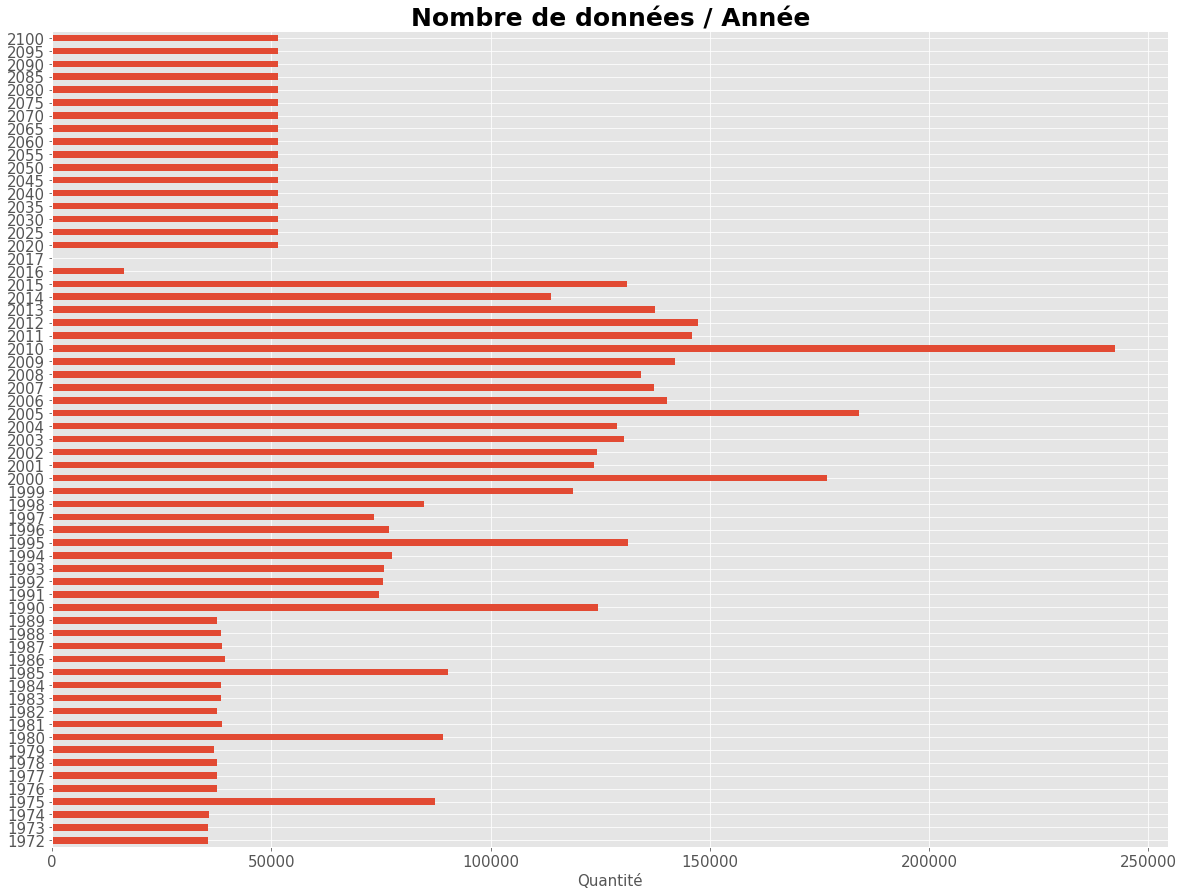

In [34]:
plt.figure(figsize=(20, 15))
data_count.iloc[:, 4:-2].sum(axis=0).plot(kind='barh', width=0.5, fontsize=15)

plt.title('Nombre de données / Année')
plt.xlabel('Quantité')
plt.ylabel('')
plt.savefig('p2_00_graphic/data_indicators_years.png')
plt.show()

Les années ne sont pas toutes significatives, elles restent en grande majorité inexploitables du fait des valeurs manquantes. Notons que les indicateurs après 2015 ne sont pas exploitables, à exclure de l'analyse. Suivant le contexte de l'analyse et les objectifs souhaités, on peut distinguer également les années avant 2000 comme étant moins qualitatives. **Des indicateurs, des années, mais avons-nous des indicateurs en corrélation avec notre contexte métier?**

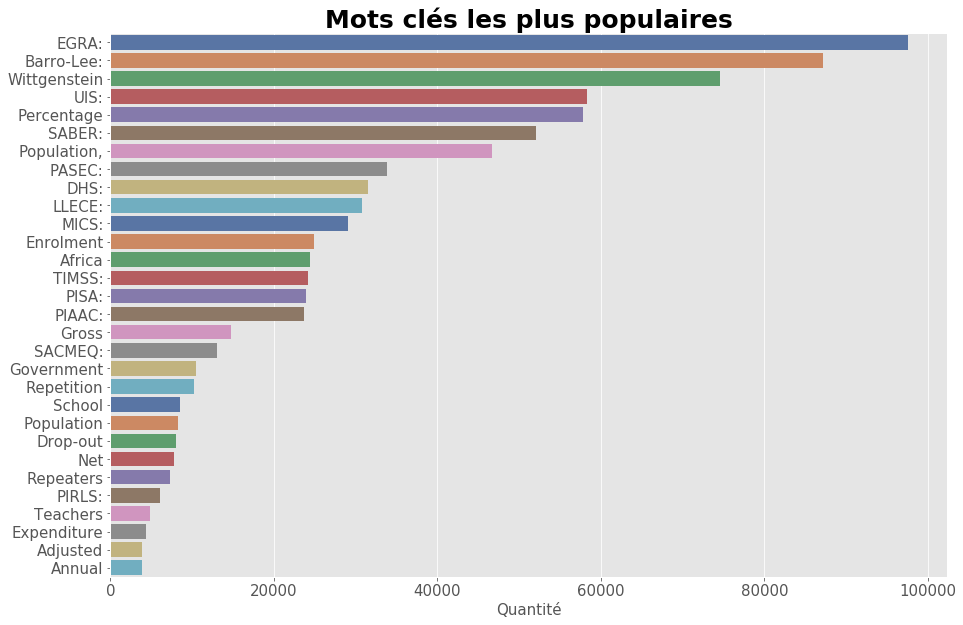

In [35]:
#Popular words checklist
import collections
keyword_list = [i.split(' ', 1)[0] for i in data['Indicator Name'].tolist()]
keywords = pd.DataFrame(collections.Counter(keyword_list).most_common(30),
                                          columns=['keyword', 'count'])

sns.barplot(y = 'keyword', x='count', data = keywords, palette='deep')
plt.title('Mots clés les plus populaires')
plt.xlabel('Quantité')
plt.ylabel('')
plt.savefig('p2_00_graphic/popular_words.png')
plt.show()

**Les mots clés les plus représentatifs des 3665 indicateurs sont évocateurs du secteur de l'éducation.**

- EGRA : Early Grade Reading Assessment
- Barro-lee : Dataset relatif à l'éducation
- Wittgenstein : Wittgenstein Centre Human Capital Data Explore
- UIS : UNESCO Institut de Statistiques
- PISA : Tests comparatifs de compétences pour les élèves
- Teachers
- School
- etc…

**Cet échantillon est d'une importance capitale pour répondre aux attentes de l'entreprise.** Un historique sur plusieurs années semble être exploitable, avec des indicateurs propres à l'éducation et des observations selon l'ensemble des pays de Monde. 

**`EdStatsFootNote.csv`**\
Informations sur l'année d'origine des données, avec description des données.

In [36]:
footnote = pd.read_csv('p2_data/EdStatsFootNote.csv')
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [37]:
footnote.shape

(643638, 5)

In [38]:
footnote.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [39]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(footnote)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


DESCRIPTION    100.0
Year           100.0
SeriesCode     100.0
CountryCode    100.0
Unnamed: 4       0.0
dtype: float64

In [40]:
footnote.duplicated(subset=['CountryCode', 'SeriesCode', 'Year'], keep=False).sum()

0

In [41]:
footnote['Year'].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

Les années semblent similaires à celles du dataframe `country`, il est donc pertinent de les uniformiser…\
Quoi qu'il en soit dans l'état aucune utilisation possible.

In [42]:
footnote['Year'] = [y[2:] for y in footnote['Year']]
footnote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

In [43]:
display(footnote['SeriesCode'].nunique())
display(footnote['DESCRIPTION'].unique().tolist())

1558

['Country estimation.',
 'UIS Estimation',
 'UNESCO Institute for Statistics (UIS) estimate',
 '5-year average value between 0s and 5s',
 'Percentage includes lower secondary education.',
 'Country data',
 'Country Data',
 'UNSD WPP08 revision file 2A and 3A.',
 'Not applicable',
 'Percentage includes all tertiary levels (ISCED 5-8)',
 'Estimated',
 'UIS estimation.',
 '<0.1. Plausible bound is <0.1-0.1',
 'Uncertainty bound is 127.1 - 148.2',
 'Uncertainty bound is 146.6 - 173.2',
 'Uncertainty bound is 134.1 - 157.1',
 'Uncertainty bound is 207.2 - 261.6',
 'Uncertainty bound is 60.2 - 86.1',
 'Uncertainty bound is 184.5 - 227.9',
 'Uncertainty bound is 167.8 - 201.7',
 'Uncertainty bound is 130.4 - 152.5',
 'Uncertainty bound is 240.3 - 308.5',
 'Country estimation',
 'Uncertainty bound is 212.6 - 269.3',
 'Uncertainty bound is 201.4 - 253.3',
 'Uncertainty bound is 190.1 - 236.6',
 'Uncertainty bound is 162.4 - 193.8',
 'Uncertainty bound is 123.7 - 144.2',
 'Uncertainty bound is 9

Les données sont-elles plus représentatives sur certaine(s) année(s)?

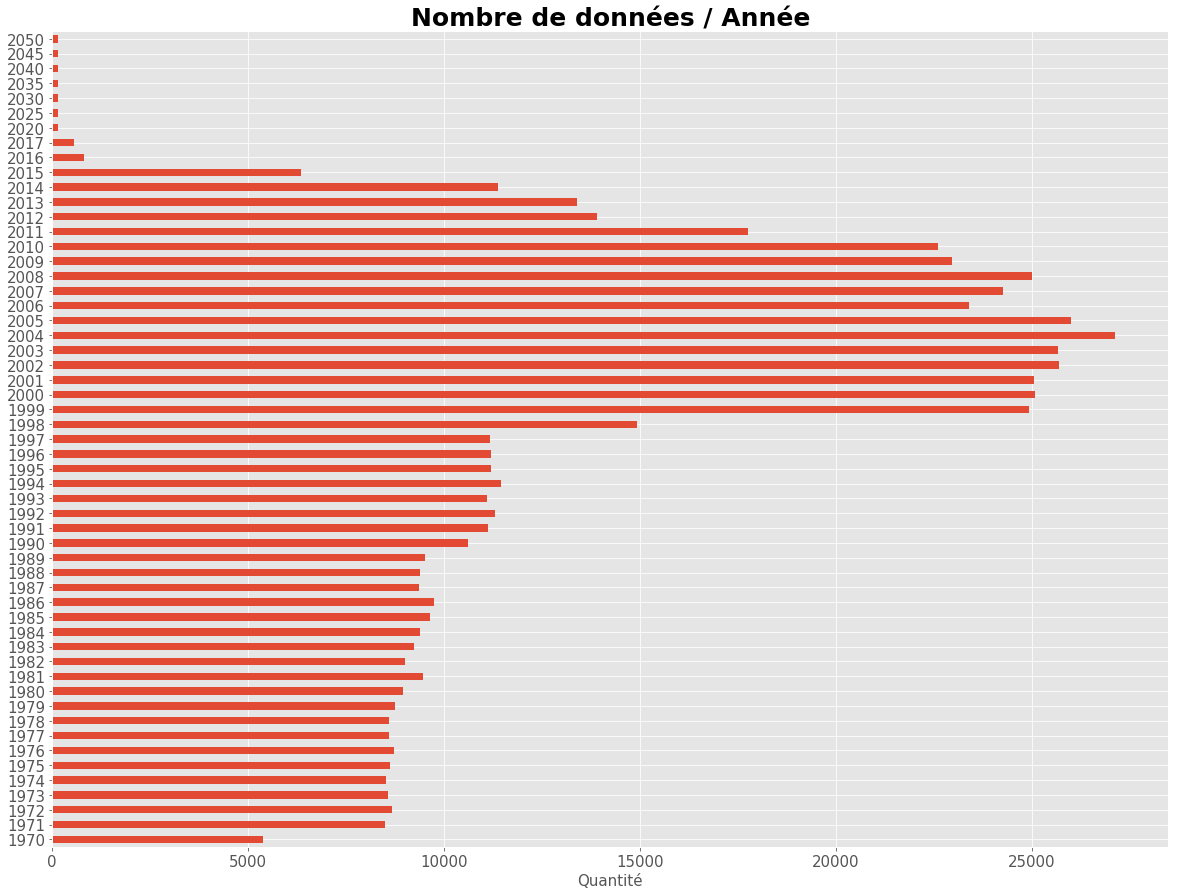

In [44]:
plt.figure(figsize=(20, 15))
footnote.groupby('Year')['Year'].count().plot(kind='barh', width=0.5, fontsize=15)

plt.title('Nombre de données / Année')
plt.xlabel('Quantité')
plt.ylabel('')
plt.savefig('p2_00_graphic/donnees_annees.png')
plt.show()

**Les données sont plus représentatives entre 2000 et 2015**, on retrouve le même constat que dans l'échantillon précédent. Le contexte métier des cours proposés uniquement en ligne repose principalement sur le déploiement de l'Internet, l'année 2000 peut-être prise comme année de départ dans l'analyse effectuée. Après 2010, les données semblent être de plus en plus incomplètes. Entre 2010 et 2015, les données décroissent, suivant les indicateurs retenus l'analyse pourra se basée jusqu'à 2010 ou 2015.

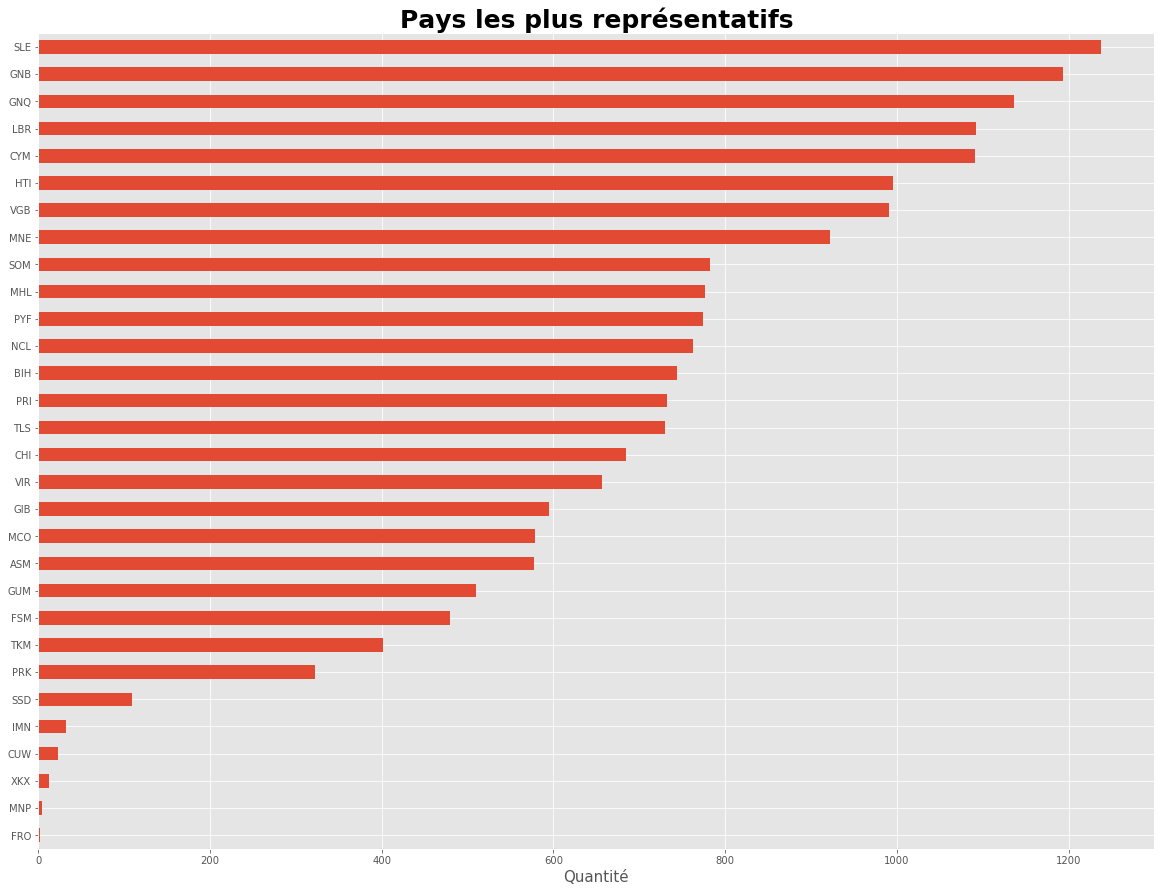

In [45]:
plt.figure(figsize=(20, 15))

footnote.groupby('CountryCode')['Year'].count().sort_values()[:30].plot(kind='barh', width=0.5, fontsize=10)
plt.title('Pays les plus représentatifs')
plt.xlabel('Quantité')
plt.ylabel('')
plt.savefig('p2_00_graphic/country_years.png')
plt.show()


L'échantillon exprime des données en lien avec le contexte métier de l'éducation. Plus de 1500 indicateurs identifiés par leur code, et une courte description.  

**`EdStatsSeries.csv`**\
Informations descriptives sur les indicateurs socio économiques rencontrés sur les jeux de données précédents.

In [46]:
#Loading 'EdStatsSeries.csv'
seriesCode = pd.read_csv('p2_data/EdStatsSeries.csv')
seriesCode.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
seriesCode.shape

(3665, 21)

In [48]:
seriesCode.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [49]:
seriesCode.isna().sum().sort_values(ascending=True)

Series Code                               0
Topic                                     0
Indicator Name                            0
Long definition                           0
Source                                    0
Short definition                       1509
Other notes                            3113
Base Period                            3351
Related source links                   3450
Periodicity                            3566
Aggregation method                     3618
Statistical concept and methodology    3642
Limitations and exceptions             3651
General comments                       3651
Development relevance                  3662
Notes from original source             3665
License Type                           3665
Unit of measure                        3665
Other web links                        3665
Related indicators                     3665
Unnamed: 20                            3665
dtype: int64

In [50]:
print("% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON")
missing_value_clean(seriesCode)

% VALEURS DISPONIBLES / VARIABLE DE L'ÉCHANTILLON


Series Code                            100.0
Topic                                  100.0
Indicator Name                         100.0
Source                                 100.0
Long definition                        100.0
Short definition                        59.0
Other notes                             15.0
Base Period                              9.0
Related source links                     6.0
Periodicity                              3.0
Statistical concept and methodology      1.0
Aggregation method                       1.0
Unit of measure                          0.0
Unnamed: 20                              0.0
License Type                             0.0
Notes from original source               0.0
General comments                         0.0
Development relevance                    0.0
Other web links                          0.0
Related indicators                       0.0
Limitations and exceptions               0.0
dtype: float64

Notons que seules les 5 premières variables listées ci-dessus peuvent-être exploitées.

In [51]:
seriesCode.duplicated('Series Code').sum()

0

In [52]:
seriesCode['Series Code'].nunique() == data['Indicator Code'].nunique()

True

In [53]:
seriesCode['Source'].unique()

array(['Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/',
       'Demographic and Health Surveys (DHS)',
       'World Bank staff calculations based on Multiple Indicator Cluster Survey (MICS) data',
       'Multiple Indicator Cluster Surveys (MICS)',
       'International Telecommunication Union, World Telecommunication/ICT Development Report and database.',
       'Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/',
       'Latin American Laboratory for Assessment of the Quality of Education (LLECE)',
       "Programme d'Analyse des Systèmes Educatifs de la CONFEMEN/Program for the Analysis of CONFEMEN Education Systems (PASEC): http://www.pasec.confemen.org/",
       'OECD Programme for the International Assessment of Adult Competencies (PIAAC)',
       'International Association for the Evaluation of Educational Achievement (IEA) Progress in International Reading Literacy Study (PIRLS)',
       'OECD Programme for International Student Assessme

In [54]:
seriesCode['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [55]:
seriesCode[seriesCode['Topic'].isin(['Secondary', 'Tertiary'])]['Series Code'].unique() #Restriction example

array(['SE.ENR.PRSC.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS',
       'SE.SCH.LIFE', 'SE.SCH.LIFE.FE', 'SE.SCH.LIFE.MA', 'SE.SEC.AGES',
       'SE.SEC.CMPT.LO.FE.ZS', 'SE.SEC.CMPT.LO.MA.ZS',
       'SE.SEC.CMPT.LO.ZS', 'SE.SEC.DURS', 'SE.SEC.DURS.LO ',
       'SE.SEC.DURS.UP', 'SE.SEC.ENRL', 'SE.SEC.ENRL.FE',
       'SE.SEC.ENRL.FE.VO.ZS', 'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC',
       'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS',
       'SE.SEC.ENRL.MA.VO.ZS', 'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE',
       'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR',
       'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.LO.FE',
       'SE.SEC.ENRR.LO.MA', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.UP',
       'SE.SEC.ENRR.UP.FE ', 'SE.SEC.ENRR.UP.MA', 'SE.SEC.NENR',
       'SE.SEC.NENR.FE', 'SE.SEC.NENR.MA', 'SE.SEC.PRIV.ZS',
       'SE.SEC.PROG.FE.ZS', 'SE.SEC.PROG.MA.ZS', 'SE.SEC.PROG.ZS',
       'SE.TER.CMPL.FE.ZS', 'SE.TER.CMPL.MA.ZS', 'SE.TER.CMPL.ZS',
       'SE.TER.ENRL', 'SE.TER.ENRL.

Ici nous comprenons que **la variable 'Topic' peut avoir une utilité** dans la sélection de critères propres au contexte métier. 

---

## Note de synthèse de la pré-analyse

Les données chargées à partir du site worldbank.org permettent en effet d'obtenir un historique d'indicateurs propres à notre problématique métier l'éducation selon les pays, des groupements par zones géographiques, mais également des valeurs à spectres plus larges sur l'économie, la démographie, la richesse, etc… 

- 5 jeux de données à degré d'utilité très variable
- Observations à forte granularité géographique : pays et groupement par zones
- Variables disponibles sur notre contexte métier de l'éducation
- Variables disponibles avec des notions plus larges (population, richesse, technologique, …)
- Historique des données à partir de 1970, mais sans grande utilité causée par les valeurs manquantes
- 2000 à 2015 sont des années recommandées pour le traitement des objectifs attendus

**Détails d'analyse sur nos jeux de données :**

**`EdStatsCountry.csv`**
- Informations très larges sur le contexte économique de chaque pays du Monde.
- 241 observations
- 32 variables
- 2354 valeurs manquantes dont une variable obsolète à supprimer "Unnamed: 31"
- 0 doublon

Les principaux points clés exploitables facilement :
- Notion de 'Région': groupement des pays en 6 zones géographiques
- Notions démographiques
- Devise monétaire

--- 
**`EdStatsCountry-Series.csv`**
- Informations descriptives sur les sources des données du dataframe 'country'.
- 613 observations
- 4 variables (dont une obsolète à supprimer "Unnamed: 3")
- 0 valeur manquante
- 0 doublon

Ce jeu de données n'a pas d'utilité immédiate dans le cadre de l'analyse.

--- 
**`EdStatsData.csv`**
- Informations sur l'évolution de nombreux indicateurs pour chaque pays du Monde.
- 886930 observations
- 3665 indicateurs
- 70 variables (principalement des années de 1970 à 2050)
- 1 variable obsolète à supprimer 'Unnamed: 69'
- Valeurs manquantes en grande quantité sur l'ensemble du couple pays/années
- 2000 à 2010 (voir 2015) années les moins impactées par les valeurs manquantes
- 0 doublon

Ce jeu de données est essentiel dans l'analyse de notre problématique. Malgré les valeurs manquantes, il est indispensable à l'exploitation des indicateurs en fonction des pays.

---
**`EdStatsSeries.csv`**
- Informations descriptives sur les indicateurs du jeu de données précédent.
- 3665 observations
- 21 variables (dont une variable obsolète à supprimer 'Unnamed: 20')
- Valeurs manquantes en grande quantité
- 0 doublon

Ces données apportent plus de détails sur nos indicateurs, il n'y a pas d'utilité directe dans l'analyse effectuée, mais cela peut venir en complément afin de mieux comprendre données. Par exemple, sur une action de choix d'indicateurs, à l'aide d'une première sélection via la variable 'Topic'.

--- 
**`EdStatsFootNote.csv`**
- Informations sur l'année d'origine des données, avec description des données.
- 643638 observations
- 5 variables (dont une variable obsolète à supprimer : 'Unnamed: 4')
- 0 valeurs manquantes (sans tenir compte de 'Unnamed: 4')
- 0 doublon

Les années 2000 à 2015 ressortent également comme étant les plus représentatives en terme de disponibilité d'indicateurs _(années avec le moins de valeurs manquantes._ 